In [1]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Transformer

In [3]:
infile = 'LS_5789_Veg_Frac_1984_2023_missing_2012_39lyr_stck_041524_Delta.tif'
r1 = rioxarray.open_rasterio(
    infile )
r1

<xarray.DataArray (band: 39, y: 696, x: 701)>
[19027944 values with dtype=float64]
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39
  * x            (x) float64 -89.3 -89.3 -89.3 -89.3 ... -89.12 -89.12 -89.12
  * y            (y) float64 29.33 29.33 29.33 29.33 ... 29.15 29.15 29.15 29.15
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0.09312218985086616
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         0.17753535996879
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.30515928603086
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               ('b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8',...

In [34]:
lon = r1.x.values
lat = r1.y.values
band = r1.band.values-1 # minus one to use as index
a = r1[:,:,:].values

# need to 
transformer = Transformer.from_crs( 'epsg:4326', 'epsg:26916',  ) # WGS84 to UTM18
x, y = transformer.transform( lat, lon )

ProjError: x, y, z, and time must be same size if included.

In [35]:
# Based on the filename, make a list of years that correspond to the bands
yr = np.arange(1984,2024).tolist()
yr.remove(2012)
print(yr)
print(len(yr))

[1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
39


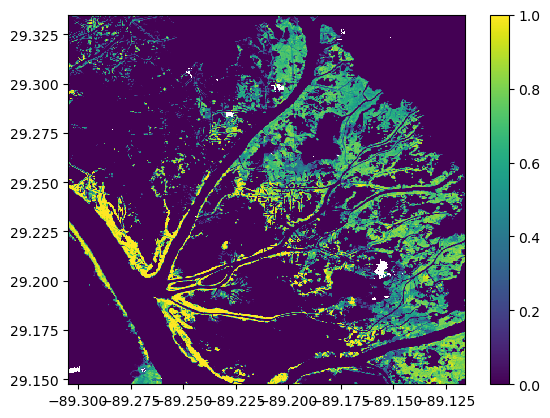

In [36]:
# plot the first band
plt.pcolormesh(lon, lat, a[0,:,:])
plt.colorbar()

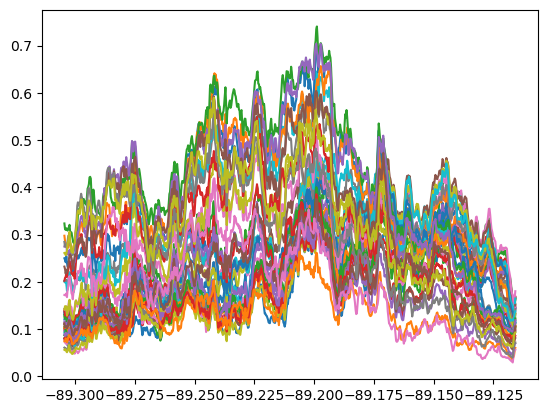

In [37]:
# "cross-shore" profiles made by averaging along y-axis
# plot all of the profiles
profiles = np.zeros((39,len(x)))
for i, b in enumerate( band ):
    profiles[i,:] = np.nanmean(a[i,:,:], axis=0)
    plt.plot( lon, profiles[i,:] )
    